✅ Dataset Loaded Successfully!
Shape of dataset: (1025, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values Per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



✅ Missing values handled successfully!
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Categorical Columns: Index([], dtype='object')

✅ Encoding Done! Shape after encoding: (1025, 14)

✅ Scaling Done! Dataset is ready for modeling.


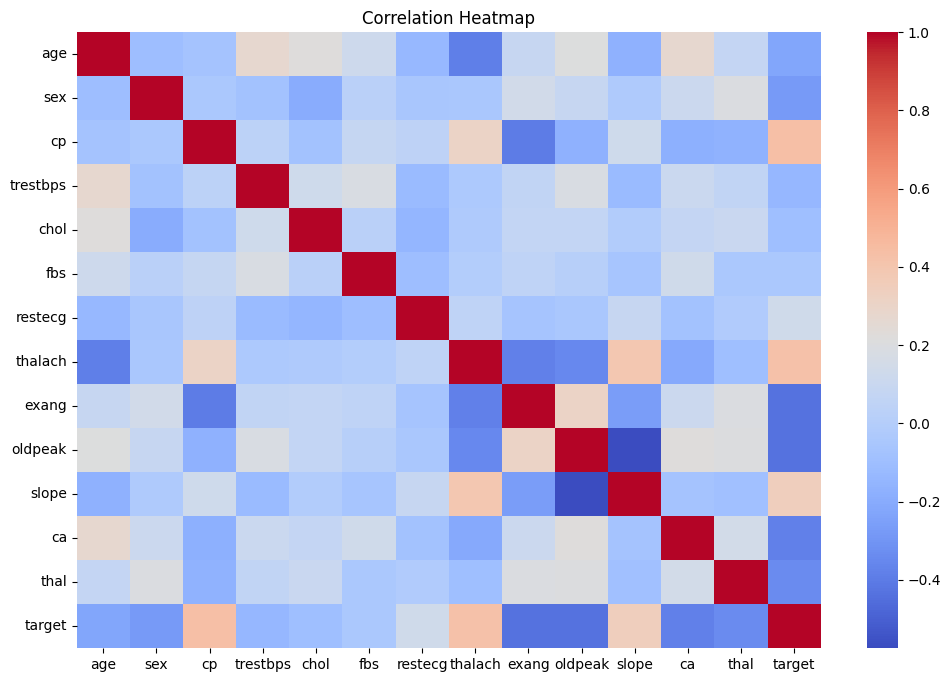

C:\Users\Linda\AppData\Local\Temp\ipykernel_22216\766235356.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


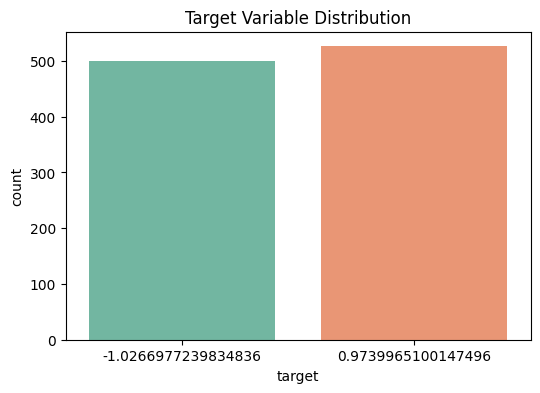

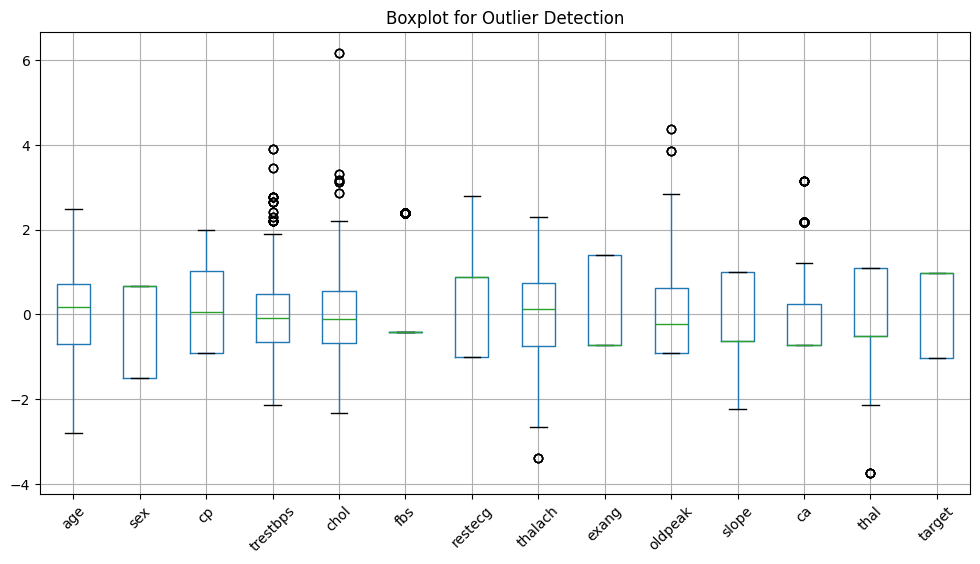


✅ Cleaned dataset saved as 'data/heart_cleaned.csv'


In [5]:

# STEP 1: IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# To display all columns when printing data
pd.set_option('display.max_columns', None)

# STEP 2: LOAD DATASET
df = pd.read_csv("heart_disease.csv")  # Adjust path if needed

print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# STEP 3: BASIC DATA INFO
print("\nDataset Info:")
print(df.info())

print("\nMissing Values Per Column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
display(df.describe())

# STEP 4: HANDLE MISSING VALUES
# Check if any column has missing values
if df.isnull().sum().sum() > 0:
    # Example: Fill numerical missing values with median
    df.fillna(df.median(), inplace=True)
    # For categorical columns, we can fill missing values with mode
    df.fillna(df.mode().iloc[0], inplace=True)

print("\n✅ Missing values handled successfully!")
print(df.isnull().sum())


# STEP 5: ENCODE CATEGORICAL VARIABLES
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

if len(categorical_cols) > 0:
    # Use Label Encoding for binary columns & One-Hot for multi-categories
    for col in categorical_cols:
        if df[col].nunique() <= 2:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

print("\n✅ Encoding Done! Shape after encoding:", df.shape)


# STEP 6: SCALE NUMERICAL FEATURES
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\n✅ Scaling Done! Dataset is ready for modeling.")

# STEP 7: EXPLORATORY DATA ANALYSIS (EDA)
# 1. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 2. Class Distribution (Target Variable)
if 'target' in df.columns:  # Adjust target name if needed
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=df, palette='Set2')
    plt.title("Target Variable Distribution")
    plt.show()

# 3. Boxplots for Outliers
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


# STEP 8: SAVE CLEANED DATA
df.to_csv("heart_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'data/heart_cleaned.csv'")
